In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import folium
import re
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
def concat_frames_columns_emi(geo_response, response, date_range, time_range='4am-6am', days='m-f', in_or_out='inbound'):
    """This function pulls in two API requests, puts one in a geodataframe the other in a dataframe and concats desired columns"""
    geo_df = gpd.GeoDataFrame.from_features(geo_response.json()['features'])
    res_df = pd.DataFrame(response.json()['data']['segments'])
    full_df = pd.concat([geo_df, res_df[['countForSegment', 'percent20Secs']]], axis = 1)
    full_df['dates'] = date_range
    full_df['time'] = time_range
    full_df['days_of_week'] = days
    full_df['direction']= in_or_out
    full_df['max_seg_count'] = full_df['countForSegment'].max()
    full_df['proportion_of_segments'] = full_df['countForSegment']/full_df['max_seg_count']
    return full_df

In [3]:
with open('../data/WeGo.json') as fi:
    credentials = json.load(fi)

In [4]:
Authorization = credentials['Authorization']

In [5]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/23'

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [6]:
params = {
    'direction': '1',
    'startDate': '01-25-2022',
    'beginTime' : '04:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '02-24-2022',
    'endTime' : '06:00',
    'excludeDates': '02-18-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}

#use the EXACT same parameters as above except do not include the format parameter below
params1 = {
    'direction': '1',
    'startDate': '01-25-2022',
    'beginTime' : '04:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '02-24-2022',
    'endTime' : '06:00',
    'excludeDates': '02-18-2022',
    'resolution': 'hiRes',
}

In [7]:
emi_jantofeb = concat_frames_columns_emi(requests.get(URL, params = params, headers = headers), 
                                      requests.get(URL, params = params1, headers = headers), "1/25/22-2/24/22")
emi_jantofeb

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.78110 36.16730, -86.78121 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,4.585833,5.268618,9.758,6.013,...,3.158,1.781,66,3.741,1/25/22-2/24/22,4am-6am,m-f,inbound,104,0.634615
1,"LINESTRING (-86.76911 36.20381, -86.76915 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.547353,9.525574,4.625,4.139,...,1.750,1.525,85,1.850,1/25/22-2/24/22,4am-6am,m-f,inbound,104,0.817308
2,"LINESTRING (-86.77604 36.16755, -86.77628 36.1...",WOON1SWF,Woodland St & N 1st St Wb,UNI2AWN,Union St & 2nd Ave Wb,24.869,2.083270,11.937483,3.024,2.491,...,1.696,0.996,74,1.816,1/25/22-2/24/22,4am-6am,m-f,inbound,104,0.711538
3,"LINESTRING (-86.77385 36.17218, -86.77381 36.1...",1SOLDSM,N 1st St & Oldham St Sb,WOON1SWF,Woodland St & N 1st St Wb,23.964,1.772146,13.522588,3.853,2.132,...,1.505,1.279,82,1.594,1/25/22-2/24/22,4am-6am,m-f,inbound,104,0.788462
4,"LINESTRING (-86.77266 36.19266, -86.77269 36.1...",DICLIGSF,Dickerson Pike & Ligon Ave Sb,DICRICSN,Dickerson Pike & Richardson Ave Sb,24.381,2.719365,8.965696,6.582,4.887,...,1.534,1.207,85,1.646,1/25/22-2/24/22,4am-6am,m-f,inbound,104,0.817308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,"LINESTRING (-86.77063 36.19883, -86.77073 36.1...",DICGATSN,Dickerson Pike & Gatewood Ave Sb,DICMARSM,Dicerkson Pike & Marie Sb,23.038,1.931160,11.929617,8.771,2.353,...,1.465,1.372,81,1.554,1/25/22-2/24/22,4am-6am,m-f,inbound,104,0.778846
443,"LINESTRING (-86.76053 36.22505, -86.76060 36.2...",DICHILSF,Dickerson Pike & Hillhurst Dr Sb,DICSUNSN,Dickerson Pike & Sunset Cr Sb,23.132,1.698990,13.615148,2.809,2.141,...,1.376,1.030,97,1.459,1/25/22-2/24/22,4am-6am,m-f,inbound,104,0.932692
444,"LINESTRING (-86.76968 36.20101, -86.76973 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.103306,11.536600,3.616,2.882,...,1.546,1.235,85,1.645,1/25/22-2/24/22,4am-6am,m-f,inbound,104,0.817308
445,"LINESTRING (-86.77093 36.19825, -86.77103 36.1...",DICMARSM,Dicerkson Pike & Marie Sb,DICLUCSN,Dickerson Pike & Lucile St Sb,23.359,1.750275,13.345903,3.998,2.041,...,1.420,1.378,80,1.523,1/25/22-2/24/22,4am-6am,m-f,inbound,104,0.769231


In [8]:
params = {
    'direction': '1',
    'startDate': '02-25-2022',
    'beginTime' : '04:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '03-26-2022',
    'endTime' : '06:00',
    'excludeDates': '03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}


params1 = {
    'direction': '1',
    'startDate': '02-25-2022',
    'beginTime' : '04:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '03-26-2022',
    'endTime' : '06:00',
    'excludeDates': '03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022',
    'resolution': 'hiRes',
}

In [9]:
emi_febtomar = concat_frames_columns_emi(requests.get(URL, params = params, headers = headers), 
                                      requests.get(URL, params = params1, headers = headers), "2/25/22-3/26/22")
emi_febtomar

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.78110 36.16730, -86.78121 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,4.785804,5.048473,18.155,5.346,...,3.559,2.994,46,3.889,2/25/22-3/26/22,4am-6am,m-f,inbound,77,0.597403
1,"LINESTRING (-86.76911 36.20381, -86.76915 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.987413,8.122412,5.003,4.353,...,1.785,1.593,63,2.008,2/25/22-3/26/22,4am-6am,m-f,inbound,77,0.818182
2,"LINESTRING (-86.77604 36.16755, -86.77628 36.1...",WOON1SWF,Woodland St & N 1st St Wb,UNI2AWN,Union St & 2nd Ave Wb,24.869,1.985049,12.528154,2.726,2.309,...,1.682,1.550,61,1.752,2/25/22-3/26/22,4am-6am,m-f,inbound,77,0.792208
3,"LINESTRING (-86.77385 36.17218, -86.77381 36.1...",1SOLDSM,N 1st St & Oldham St Sb,WOON1SWF,Woodland St & N 1st St Wb,23.964,1.686889,14.206033,2.358,1.876,...,1.434,1.206,63,1.538,2/25/22-3/26/22,4am-6am,m-f,inbound,77,0.818182
4,"LINESTRING (-86.77266 36.19266, -86.77269 36.1...",DICLIGSF,Dickerson Pike & Ligon Ave Sb,DICRICSN,Dickerson Pike & Richardson Ave Sb,24.381,2.828115,8.620937,6.593,5.159,...,1.442,1.307,61,1.592,2/25/22-3/26/22,4am-6am,m-f,inbound,77,0.792208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,"LINESTRING (-86.77063 36.19883, -86.77073 36.1...",DICGATSN,Dickerson Pike & Gatewood Ave Sb,DICMARSM,Dicerkson Pike & Marie Sb,23.038,1.808383,12.739558,3.313,2.325,...,1.423,1.165,60,1.490,2/25/22-3/26/22,4am-6am,m-f,inbound,77,0.779221
443,"LINESTRING (-86.76053 36.22505, -86.76060 36.2...",DICHILSF,Dickerson Pike & Hillhurst Dr Sb,DICSUNSN,Dickerson Pike & Sunset Cr Sb,23.132,1.716459,13.476582,2.362,2.135,...,1.447,1.245,61,1.489,2/25/22-3/26/22,4am-6am,m-f,inbound,77,0.792208
444,"LINESTRING (-86.76968 36.20101, -86.76973 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.114226,11.477013,3.293,2.866,...,1.694,1.317,62,1.763,2/25/22-3/26/22,4am-6am,m-f,inbound,77,0.805195
445,"LINESTRING (-86.77093 36.19825, -86.77103 36.1...",DICMARSM,Dicerkson Pike & Marie Sb,DICLUCSN,Dickerson Pike & Lucile St Sb,23.359,1.756333,13.299870,3.359,2.089,...,1.442,1.181,60,1.507,2/25/22-3/26/22,4am-6am,m-f,inbound,77,0.779221


In [10]:
params = {
    'direction': '1',
    'startDate': '03-27-2022',
    'beginTime' : '04:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '04-26-2022',
    'endTime' : '06:00',
    'excludeDates': '04-14-2022,04-15-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}


params1 = {
    'direction': '1',
    'startDate': '03-27-2022',
    'beginTime' : '04:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '04-26-2022',
    'endTime' : '06:00',
    'excludeDates': '04-14-2022,04-15-2022',
    'resolution': 'hiRes',
}

In [11]:
emi_martoapr = concat_frames_columns_emi(requests.get(URL, params = params, headers = headers), 
                                       requests.get(URL, params = params1, headers = headers), "3/27/22-4/26/22")
emi_martoapr

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.78110 36.16730, -86.78121 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,4.482410,5.390181,7.354,5.779,...,3.273,2.612,61,3.513,3/27/22-4/26/22,4am-6am,m-f,inbound,99,0.616162
1,"LINESTRING (-86.76911 36.20381, -86.76915 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.746405,8.835186,6.987,4.295,...,1.641,1.111,79,1.756,3/27/22-4/26/22,4am-6am,m-f,inbound,99,0.797980
2,"LINESTRING (-86.77604 36.16755, -86.77628 36.1...",WOON1SWF,Woodland St & N 1st St Wb,UNI2AWN,Union St & 2nd Ave Wb,24.869,2.033132,12.231867,3.081,2.416,...,1.646,1.474,76,1.736,3/27/22-4/26/22,4am-6am,m-f,inbound,99,0.767677
3,"LINESTRING (-86.77385 36.17218, -86.77381 36.1...",1SOLDSM,N 1st St & Oldham St Sb,WOON1SWF,Woodland St & N 1st St Wb,23.964,1.769987,13.539082,4.171,2.106,...,1.466,1.226,79,1.543,3/27/22-4/26/22,4am-6am,m-f,inbound,99,0.797980
4,"LINESTRING (-86.77266 36.19266, -86.77269 36.1...",DICLIGSF,Dickerson Pike & Ligon Ave Sb,DICRICSN,Dickerson Pike & Richardson Ave Sb,24.381,2.412922,10.104347,5.283,4.355,...,1.508,1.192,77,1.558,3/27/22-4/26/22,4am-6am,m-f,inbound,99,0.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,"LINESTRING (-86.76053 36.22505, -86.76060 36.2...",DICHILSF,Dickerson Pike & Hillhurst Dr Sb,DICSUNSN,Dickerson Pike & Sunset Cr Sb,23.132,1.603372,14.427095,2.561,2.019,...,1.310,1.076,94,1.375,3/27/22-4/26/22,4am-6am,m-f,inbound,99,0.949495
462,"LINESTRING (-86.76968 36.20101, -86.76973 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.062051,11.767410,3.260,2.732,...,1.584,1.404,78,1.664,3/27/22-4/26/22,4am-6am,m-f,inbound,99,0.787879
463,"LINESTRING (-86.76409 36.21495, -86.76417 36.2...",DICLORSN,Dickerson Pk & Lorraine Ave Sb,DICLEMSF,Dickerson Pike & Lemuel Rd Sb,24.938,1.896000,13.152954,2.127,2.127,...,1.701,1.701,3,1.701,3/27/22-4/26/22,4am-6am,m-f,inbound,99,0.030303
464,"LINESTRING (-86.77093 36.19825, -86.77103 36.1...",DICMARSM,Dicerkson Pike & Marie Sb,DICLUCSN,Dickerson Pike & Lucile St Sb,23.359,1.647263,14.180492,2.500,1.937,...,1.384,1.279,76,1.452,3/27/22-4/26/22,4am-6am,m-f,inbound,99,0.767677


In [12]:
params = {
    'direction': '1',
    'startDate': '04-27-2022',
    'beginTime' : '04:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '05-25-2022',
    'endTime' : '06:00',
    'format' : 'geojson',
    'resolution': 'hiRes',
}


params1 = {
    'direction': '1',
    'startDate': '04-27-2022',
    'beginTime' : '04:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '05-25-2022',
    'endTime' : '06:00',
    'resolution': 'hiRes',
}

In [13]:
emi_aprtomay = concat_frames_columns_emi(requests.get(URL, params = params, headers = headers), 
                                      requests.get(URL, params = params1, headers = headers), "4/27/22-5/25/22")
emi_aprtomay

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.78110 36.16730, -86.78121 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,4.068700,5.938260,6.973,5.092,...,2.900,2.530,60,3.261,4/27/22-5/25/22,4am-6am,m-f,inbound,98,0.612245
1,"LINESTRING (-86.76911 36.20381, -86.76915 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.557782,9.486735,4.431,3.958,...,1.706,1.463,78,1.813,4/27/22-5/25/22,4am-6am,m-f,inbound,98,0.795918
2,"LINESTRING (-86.77604 36.16755, -86.77628 36.1...",WOON1SWF,Woodland St & N 1st St Wb,UNI2AWN,Union St & 2nd Ave Wb,24.869,1.950519,12.749940,2.995,2.347,...,1.646,1.308,79,1.735,4/27/22-5/25/22,4am-6am,m-f,inbound,98,0.806122
3,"LINESTRING (-86.77385 36.17218, -86.77381 36.1...",1SOLDSM,N 1st St & Oldham St Sb,WOON1SWF,Woodland St & N 1st St Wb,23.964,1.765519,13.573346,5.683,1.859,...,1.538,1.422,79,1.564,4/27/22-5/25/22,4am-6am,m-f,inbound,98,0.806122
4,"LINESTRING (-86.77266 36.19266, -86.77269 36.1...",DICLIGSF,Dickerson Pike & Ligon Ave Sb,DICRICSN,Dickerson Pike & Richardson Ave Sb,24.381,2.555597,9.540237,6.001,4.599,...,1.425,1.286,77,1.506,4/27/22-5/25/22,4am-6am,m-f,inbound,98,0.785714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,"LINESTRING (-86.77063 36.19883, -86.77073 36.1...",DICGATSN,Dickerson Pike & Gatewood Ave Sb,DICMARSM,Dicerkson Pike & Marie Sb,23.038,1.756816,13.113496,4.117,2.179,...,1.363,1.242,76,1.439,4/27/22-5/25/22,4am-6am,m-f,inbound,98,0.775510
441,"LINESTRING (-86.76053 36.22505, -86.76060 36.2...",DICHILSF,Dickerson Pike & Hillhurst Dr Sb,DICSUNSN,Dickerson Pike & Sunset Cr Sb,23.132,1.559404,14.833872,2.237,1.936,...,1.309,1.140,94,1.381,4/27/22-5/25/22,4am-6am,m-f,inbound,98,0.959184
442,"LINESTRING (-86.76968 36.20101, -86.76973 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,1.982026,12.242524,3.250,3.068,...,1.446,1.335,77,1.503,4/27/22-5/25/22,4am-6am,m-f,inbound,98,0.785714
443,"LINESTRING (-86.77093 36.19825, -86.77103 36.1...",DICMARSM,Dicerkson Pike & Marie Sb,DICLUCSN,Dickerson Pike & Lucile St Sb,23.359,1.715797,13.614081,4.800,1.936,...,1.387,1.259,74,1.456,4/27/22-5/25/22,4am-6am,m-f,inbound,98,0.755102


In [14]:
params = {
    'direction': '1',
    'startDate': '05-26-2022',
    'beginTime' : '04:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '06-25-2022',
    'endTime' : '06:00',
    'excludeDates': '05-30-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}


params1 = {
    'direction': '1',
    'startDate': '05-26-2022',
    'beginTime' : '04:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '06-25-2022',
    'endTime' : '06:00',
    'excludeDates': '05-30-2022',
    'resolution': 'hiRes',
}

In [15]:
emi_maytojun = concat_frames_columns_emi(requests.get(URL, params = params, headers = headers), 
                                      requests.get(URL, params = params1, headers = headers), "5/26/22-6/25/22")
emi_maytojun

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.78110 36.16730, -86.78121 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,4.356967,5.545371,11.292,5.352,...,3.303,2.695,61,3.650,5/26/22-6/25/22,4am-6am,m-f,inbound,102,0.598039
1,"LINESTRING (-86.76911 36.20381, -86.76915 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.703926,8.973988,6.526,4.284,...,1.648,1.341,81,1.785,5/26/22-6/25/22,4am-6am,m-f,inbound,102,0.794118
2,"LINESTRING (-86.77604 36.16755, -86.77628 36.1...",WOON1SWF,Woodland St & N 1st St Wb,UNI2AWN,Union St & 2nd Ave Wb,24.869,2.013692,12.349952,2.702,2.335,...,1.645,1.520,78,1.763,5/26/22-6/25/22,4am-6am,m-f,inbound,102,0.764706
3,"LINESTRING (-86.77385 36.17218, -86.77381 36.1...",1SOLDSM,N 1st St & Oldham St Sb,WOON1SWF,Woodland St & N 1st St Wb,23.964,1.718013,13.948672,5.582,1.962,...,1.420,1.268,79,1.496,5/26/22-6/25/22,4am-6am,m-f,inbound,102,0.774510
4,"LINESTRING (-86.77266 36.19266, -86.77269 36.1...",DICLIGSF,Dickerson Pike & Ligon Ave Sb,DICRICSN,Dickerson Pike & Richardson Ave Sb,24.381,2.244923,10.860506,5.948,3.678,...,1.416,1.286,78,1.503,5/26/22-6/25/22,4am-6am,m-f,inbound,102,0.764706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,"LINESTRING (-86.77063 36.19883, -86.77073 36.1...",DICGATSN,Dickerson Pike & Gatewood Ave Sb,DICMARSM,Dicerkson Pike & Marie Sb,23.038,1.632667,14.110655,3.254,2.004,...,1.288,1.148,75,1.372,5/26/22-6/25/22,4am-6am,m-f,inbound,102,0.735294
441,"LINESTRING (-86.76053 36.22505, -86.76060 36.2...",DICHILSF,Dickerson Pike & Hillhurst Dr Sb,DICSUNSN,Dickerson Pike & Sunset Cr Sb,23.132,1.570566,14.728448,2.977,1.874,...,1.264,1.181,99,1.350,5/26/22-6/25/22,4am-6am,m-f,inbound,102,0.970588
442,"LINESTRING (-86.76968 36.20101, -86.76973 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,1.798405,13.492511,3.171,2.542,...,1.349,1.209,79,1.449,5/26/22-6/25/22,4am-6am,m-f,inbound,102,0.774510
443,"LINESTRING (-86.76408 36.21494, -86.76416 36.2...",DICLORSN,Dickerson Pk & Lorraine Ave Sb,DICLEMSF,Dickerson Pike & Lemuel Rd Sb,24.938,1.815918,13.732999,3.016,2.386,...,1.385,1.195,73,1.484,5/26/22-6/25/22,4am-6am,m-f,inbound,102,0.715686


In [16]:
params = {
    'direction': '1',
    'startDate': '06-26-2022',
    'beginTime' : '04:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '07-26-2022',
    'endTime' : '06:00',
    'excludeDates': '07-04-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}


params1 = {
    'direction': '1',
    'startDate': '06-26-2022',
    'beginTime' : '04:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '07-26-2022',
    'endTime' : '06:00',
    'excludeDates': '07-04-2022',
    'resolution': 'hiRes',
}

In [17]:
emi_juntojul = concat_frames_columns_emi(requests.get(URL, params = params, headers = headers), 
                                      requests.get(URL, params = params1, headers = headers), "6/26/22-7/26/22")
emi_juntojul

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.78110 36.16730, -86.78121 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,4.148968,5.823376,8.372,5.286,...,3.182,1.327,63,3.462,6/26/22-7/26/22,4am-6am,m-f,inbound,102,0.617647
1,"LINESTRING (-86.76911 36.20381, -86.76915 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.865963,8.466613,4.918,4.203,...,1.718,1.456,81,1.938,6/26/22-7/26/22,4am-6am,m-f,inbound,102,0.794118
2,"LINESTRING (-86.77604 36.16755, -86.77628 36.1...",WOON1SWF,Woodland St & N 1st St Wb,UNI2AWN,Union St & 2nd Ave Wb,24.869,1.957658,12.703445,2.643,2.356,...,1.685,1.536,79,1.762,6/26/22-7/26/22,4am-6am,m-f,inbound,102,0.774510
3,"LINESTRING (-86.77385 36.17218, -86.77381 36.1...",1SOLDSM,N 1st St & Oldham St Sb,WOON1SWF,Woodland St & N 1st St Wb,23.964,1.722650,13.911125,6.261,1.956,...,1.414,1.219,80,1.455,6/26/22-7/26/22,4am-6am,m-f,inbound,102,0.784314
4,"LINESTRING (-86.77266 36.19266, -86.77269 36.1...",DICLIGSF,Dickerson Pike & Ligon Ave Sb,DICRICSN,Dickerson Pike & Richardson Ave Sb,24.381,2.579111,9.453257,5.796,4.639,...,1.364,1.253,81,1.426,6/26/22-7/26/22,4am-6am,m-f,inbound,102,0.794118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,"LINESTRING (-86.77063 36.19883, -86.77073 36.1...",DICGATSN,Dickerson Pike & Gatewood Ave Sb,DICMARSM,Dicerkson Pike & Marie Sb,23.038,1.736056,13.270309,4.890,2.049,...,1.340,1.200,72,1.421,6/26/22-7/26/22,4am-6am,m-f,inbound,102,0.705882
441,"LINESTRING (-86.76053 36.22505, -86.76060 36.2...",DICHILSF,Dickerson Pike & Hillhurst Dr Sb,DICSUNSN,Dickerson Pike & Sunset Cr Sb,23.132,1.611683,14.352698,2.699,1.980,...,1.310,1.229,101,1.369,6/26/22-7/26/22,4am-6am,m-f,inbound,102,0.990196
442,"LINESTRING (-86.76968 36.20101, -86.76973 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.002987,12.114407,3.337,2.753,...,1.390,1.228,79,1.497,6/26/22-7/26/22,4am-6am,m-f,inbound,102,0.774510
443,"LINESTRING (-86.77093 36.19825, -86.77103 36.1...",DICMARSM,Dicerkson Pike & Marie Sb,DICLUCSN,Dickerson Pike & Lucile St Sb,23.359,1.633405,14.300801,4.260,1.809,...,1.365,1.217,74,1.424,6/26/22-7/26/22,4am-6am,m-f,inbound,102,0.725490


In [18]:
all_emi_inschool = pd.concat([emi_jantofeb, emi_febtomar, emi_martoapr, emi_aprtomay])
all_emi_inschool = all_emi_inschool.reset_index()
all_emi_inschool.describe()

,index,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count,proportion_of_segments
count,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000
mean,225.206094,23.947367,3.942867,10.699811,19.377373,7.624193,5.147767,3.965643,2.908959,2.392919,2.075132,1.823014,76.264266,2.231980,94.543490,0.805938
std,130.442823,1.344568,12.557050,3.950276,69.301899,28.069564,18.022844,12.660457,10.917222,10.605670,10.579465,10.586313,17.726534,10.586992,10.319718,0.159212
min,0.000000,0.000000,1.395588,0.000000,1.789000,1.614000,1.506000,1.434000,1.371000,1.246000,1.176000,0.839000,1.000000,1.213000,77.000000,0.009615
25%,112.000000,23.411000,1.754350,7.935641,3.046000,2.132000,1.936000,1.819000,1.662000,1.523000,1.376000,1.181000,63.000000,1.459000,98.000000,0.767677
50%,225.000000,24.161000,2.050557,11.625932,4.606000,2.739000,2.343000,2.114000,1.832000,1.662000,1.484000,1.282000,78.000000,1.581000,99.000000,0.806122
75%,338.000000,24.801000,2.994016,13.627693,8.622000,4.356000,3.509000,3.066000,2.494000,2.073000,1.707000,1.465000,90.000000,1.882000,99.000000,0.935065
max,465.000000,24.969000,286.006000,17.771004,1876.013000,569.256000,332.314000,286.006000,286.006000,286.006000,286.006000,286.006000,104.000000,286.006000,104.000000,1.000000


In [19]:
all_emi_summer = pd.concat([emi_maytojun, emi_juntojul])
all_emi_summer = all_emi_summer.reset_index()
all_emi_summer.describe()

,index,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count,proportion_of_segments
count,890.00000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.0,890.000000
mean,222.00000,24.020076,3.363578,10.977799,16.162209,6.849944,4.330962,3.286099,2.411010,1.914629,1.596398,1.346276,82.407865,1.762533,102.0,0.807920
std,128.53234,0.903914,5.511674,4.061290,46.094656,20.102662,9.109275,5.090319,2.666341,1.123498,0.492603,0.360572,15.879997,0.867650,0.0,0.155686
min,0.00000,19.233000,1.372000,0.364123,1.722000,1.586000,1.473000,1.417000,1.313000,1.263000,1.054000,0.987000,12.000000,1.118000,102.0,0.117647
25%,111.00000,23.411000,1.689951,8.229098,3.116750,2.089750,1.876000,1.758500,1.592000,1.458250,1.304250,1.149000,76.000000,1.393000,102.0,0.745098
50%,222.00000,24.161000,1.999870,11.956539,4.580000,2.835000,2.316500,2.059000,1.764750,1.568000,1.397500,1.227000,80.000000,1.490000,102.0,0.784314
75%,333.00000,24.801000,2.906443,14.117100,8.599250,4.366500,3.476750,3.012000,2.458750,2.017000,1.650250,1.372000,100.750000,1.846750,102.0,0.987745
max,444.00000,24.969000,66.353879,18.076531,509.212000,274.207000,147.981000,66.243000,37.589000,20.324000,4.380000,2.945000,102.000000,17.830000,102.0,1.000000


In [20]:
emi_inschool = all_emi_inschool.loc[all_emi_inschool['proportion_of_segments'] >= 0.5]
emi_inschool.describe()

,index,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count,proportion_of_segments
count,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000
mean,224.084824,24.031934,3.177789,10.810481,17.070113,5.744971,4.029383,3.258956,2.391572,1.946324,1.640601,1.384435,78.324870,1.790973,94.495095,0.827725
std,130.878116,0.823949,4.711908,3.854313,62.616076,13.985602,8.346210,5.375862,2.373079,0.967682,0.442682,0.350706,14.379629,0.667285,10.352149,0.113826
min,0.000000,19.233000,1.395588,0.287645,1.847000,1.614000,1.506000,1.434000,1.371000,1.290000,1.180000,0.839000,39.000000,1.263000,77.000000,0.500000
25%,111.000000,23.411000,1.753013,8.100536,3.046000,2.132000,1.935000,1.818000,1.658000,1.524000,1.376000,1.181000,67.000000,1.459000,98.000000,0.775510
50%,223.000000,24.161000,2.037750,11.702797,4.553000,2.708000,2.323000,2.094000,1.829000,1.661000,1.482000,1.279000,78.000000,1.576000,98.000000,0.807692
75%,338.000000,24.801000,2.956417,13.644959,8.463000,4.289000,3.487000,3.040000,2.478000,2.052000,1.705000,1.446000,91.000000,1.877000,99.000000,0.942308
max,465.000000,24.969000,86.805063,17.771004,1876.013000,246.469000,188.792000,110.759000,36.469000,19.628000,4.510000,3.617000,104.000000,16.107000,104.000000,1.000000


In [21]:
emi_summer = all_emi_summer.loc[all_emi_summer['proportion_of_segments'] >= 0.5]
emi_summer.describe()

,index,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count,proportion_of_segments
count,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.0,849.000000
mean,220.864547,24.112749,3.036069,11.153886,14.000855,5.450046,3.775941,3.094973,2.325258,1.875959,1.592155,1.340756,84.522968,1.737395,102.0,0.828657
std,129.186375,0.727202,3.727853,3.975785,37.030170,10.650503,5.664086,4.238768,2.127301,0.809980,0.471701,0.344994,12.751609,0.634682,0.0,0.125016
min,0.000000,21.752000,1.372000,0.586487,1.722000,1.586000,1.473000,1.417000,1.313000,1.263000,1.159000,0.987000,51.000000,1.224000,102.0,0.500000
25%,109.000000,23.861000,1.687706,8.347561,3.069000,2.072000,1.872000,1.754000,1.591000,1.458000,1.307000,1.149000,77.000000,1.393000,102.0,0.754902
50%,220.000000,24.161000,1.983783,12.158678,4.431000,2.758000,2.271000,2.033000,1.755500,1.565000,1.397000,1.227000,80.000000,1.488000,102.0,0.784314
75%,331.000000,24.801000,2.882931,14.192606,8.172000,4.247000,3.460000,2.976000,2.464000,2.041000,1.652000,1.372000,101.000000,1.858000,102.0,0.990196
max,444.000000,24.969000,42.573864,18.076531,342.185000,126.606000,65.987000,61.895000,35.226500,9.373000,4.373000,2.861000,102.000000,6.786000,102.0,1.000000


In [23]:
slow_emi_school = emi_inschool.loc[emi_inschool['percent20Secs'] > 2.526]
slow_emi_school.sort_values('percent20Secs', ascending=False)#.iloc[0:60]

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
507,60,"LINESTRING (-86.76897 36.20446, -86.76902 36.2...",DICOTRSN,Dickerson Pike & Old Trinity Ln Sb,DICWTRSF,Dickerson Pike & W Trinity Ln Sb,24.969,86.805063,0.287645,313.028,...,4.510,2.187,63,16.107,2/25/22-3/26/22,4am-6am,m-f,inbound,77,0.818182
1458,98,"LINESTRING (-86.78147 36.16638, -86.78171 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,12.395764,1.949134,33.007,...,2.815,2.191,55,8.863,4/27/22-5/25/22,4am-6am,m-f,inbound,98,0.561224
60,60,"LINESTRING (-86.76897 36.20446, -86.76902 36.2...",DICOTRSN,Dickerson Pike & Old Trinity Ln Sb,DICWTRSF,Dickerson Pike & W Trinity Ln Sb,24.969,76.974741,0.324379,366.924,...,2.112,1.605,85,6.370,1/25/22-2/24/22,4am-6am,m-f,inbound,104,0.817308
1442,82,"LINESTRING (-86.78123 36.16647, -86.78147 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,11.726091,2.060448,26.767,...,3.876,2.191,55,5.483,4/27/22-5/25/22,4am-6am,m-f,inbound,98,0.561224
1417,57,"LINESTRING (-86.78099 36.16657, -86.78123 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,8.086291,2.987896,15.226,...,4.199,2.191,55,5.185,4/27/22-5/25/22,4am-6am,m-f,inbound,98,0.561224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,99,"LINESTRING (-86.76888 36.20491, -86.76893 36.2...",DICOTRSN,Dickerson Pike & Old Trinity Ln Sb,DICWTRSF,Dickerson Pike & W Trinity Ln Sb,24.969,3.484586,7.165557,8.499,...,2.331,1.605,87,2.536,1/25/22-2/24/22,4am-6am,m-f,inbound,104,0.836538
117,117,"LINESTRING (-86.76884 36.20513, -86.76888 36.2...",DICOTRSN,Dickerson Pike & Old Trinity Ln Sb,DICWTRSF,Dickerson Pike & W Trinity Ln Sb,24.969,6.103552,4.090897,277.797,...,2.353,1.605,87,2.536,1/25/22-2/24/22,4am-6am,m-f,inbound,104,0.836538
1613,253,"LINESTRING (-86.77234 36.16905, -86.77258 36.1...",1SOLDSM,N 1st St & Oldham St Sb,WOON1SWF,Woodland St & N 1st St Wb,23.964,3.673633,6.523243,9.798,...,2.318,1.878,79,2.535,4/27/22-5/25/22,4am-6am,m-f,inbound,98,0.806122
871,424,"LINESTRING (-86.76830 36.20664, -86.76839 36.2...",DICOTRSN,Dickerson Pike & Old Trinity Ln Sb,DICWTRSF,Dickerson Pike & W Trinity Ln Sb,24.969,4.035048,6.188030,8.159,...,2.268,1.751,63,2.531,2/25/22-3/26/22,4am-6am,m-f,inbound,77,0.818182


In [25]:
slow_emi_summer = emi_summer.loc[emi_summer['percent20Secs'] > 2.448]
slow_emi_summer.sort_values('percent20Secs', ascending=False)#.head(60)

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
82,82,"LINESTRING (-86.78123 36.16647, -86.78147 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,11.200085,2.157216,23.899,...,3.410,2.777,59,6.786,5/26/22-6/25/22,4am-6am,m-f,inbound,102,0.578431
543,98,"LINESTRING (-86.78147 36.16638, -86.78171 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,10.953019,2.205876,29.469,...,2.905,2.096,54,6.390,6/26/22-7/26/22,4am-6am,m-f,inbound,102,0.529412
527,82,"LINESTRING (-86.78123 36.16647, -86.78147 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,10.767661,2.243849,22.079,...,3.396,2.096,56,6.279,6/26/22-7/26/22,4am-6am,m-f,inbound,102,0.549020
98,98,"LINESTRING (-86.78147 36.16638, -86.78171 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,12.849897,1.880249,33.896,...,3.325,2.777,58,6.191,5/26/22-6/25/22,4am-6am,m-f,inbound,102,0.568627
502,57,"LINESTRING (-86.78099 36.16657, -86.78123 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,8.756793,2.759115,19.545,...,4.373,2.096,58,5.672,6/26/22-7/26/22,4am-6am,m-f,inbound,102,0.568627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,54,"LINESTRING (-86.75667 36.24653, -86.75664 36.2...",DWMRTX,Dickerson Rd Walmart Exit,DICDOVSN,Dickerson Pike & Doverside Dr Sb,23.903,2.949218,8.104860,16.272,...,2.340,1.969,101,2.451,5/26/22-6/25/22,4am-6am,m-f,inbound,102,0.990196
76,76,"LINESTRING (-86.75682 36.24661, -86.75667 36.2...",DWMRTX,Dickerson Rd Walmart Exit,DICDOVSN,Dickerson Pike & Doverside Dr Sb,23.903,2.887713,8.277485,6.478,...,2.330,1.969,101,2.451,5/26/22-6/25/22,4am-6am,m-f,inbound,102,0.990196
16,16,"LINESTRING (-86.76870 36.20556, -86.76878 36.2...",DICOTRSN,Dickerson Pike & Old Trinity Ln Sb,DICWTRSF,Dickerson Pike & W Trinity Ln Sb,24.969,3.063354,8.150870,10.260,...,2.325,1.815,82,2.450,5/26/22-6/25/22,4am-6am,m-f,inbound,102,0.803922
5,5,"LINESTRING (-86.76878 36.20535, -86.76884 36.2...",DICOTRSN,Dickerson Pike & Old Trinity Ln Sb,DICWTRSF,Dickerson Pike & W Trinity Ln Sb,24.969,3.007402,8.302515,11.936,...,2.274,1.574,82,2.450,5/26/22-6/25/22,4am-6am,m-f,inbound,102,0.803922


<AxesSubplot:>

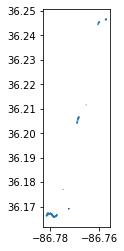

In [26]:
slow_emi_school.plot()

<AxesSubplot:>

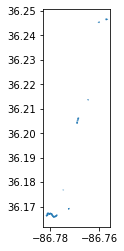

In [27]:
slow_emi_summer.plot()

In [28]:
slow_emi_scho_geojson = slow_emi_school['geometry'].to_json()

In [29]:
slow_emi_sum_geojson = slow_emi_summer['geometry'].to_json()

In [32]:
stsparams = {
    'direction': '1',
    'startDate': '04-01-2022',
    'endDate' : '04-30-2022',
    'format' : 'geojson',
}

In [33]:
inbound23_sts_df = gpd.GeoDataFrame.from_features(requests.get(URL, params = stsparams, headers = headers).json()['features'])
inbound23_sts_df

,geometry,fromStopId,fromStopName,fromStopLoc,toStopId,toStopName,toStopLoc,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,numTrips,stopId,stopName,averageDwellSeconds
0,"LINESTRING (-86.76052 36.24425, -86.76033 36.2...",DWMRT,Dickerson Rd Wal Mart,"{'lat': 36.24425, 'lon': -86.76052}",DWMRTX,Dickerson Rd Walmart Exit,"{'lat': 36.24657, 'lon': -86.75708}",478.4,54.861911,8.720075,1832.0,NaN,NaN,NaN
1,"LINESTRING (-86.75708 36.24657, -86.75668 36.2...",DWMRTX,Dickerson Rd Walmart Exit,"{'lat': 36.24657, 'lon': -86.75708}",DICDOVSN,Dickerson Pike & Doverside Dr Sb,"{'lat': 36.24418, 'lon': -86.75659}",310.7,29.698873,10.461677,1832.0,NaN,NaN,NaN
2,"LINESTRING (-86.75659 36.24418, -86.75670 36.2...",DICDOVSN,Dickerson Pike & Doverside Dr Sb,"{'lat': 36.24418, 'lon': -86.75659}",DICMAPSF,Dickerson Pike & Maplewood Trace Sb,"{'lat': 36.23278, 'lon': -86.75876}",1289.6,111.954134,11.519003,1832.0,NaN,NaN,NaN
3,"LINESTRING (-86.75876 36.23278, -86.75944 36.2...",DICMAPSF,Dickerson Pike & Maplewood Trace Sb,"{'lat': 36.23278, 'lon': -86.75876}",DICEWISF,Dickerson Pike & Ewing Dr Sb,"{'lat': 36.22873, 'lon': -86.75944}",454.4,53.599952,8.477620,1832.0,NaN,NaN,NaN
4,"LINESTRING (-86.75944 36.22873, -86.75951 36.2...",DICEWISF,Dickerson Pike & Ewing Dr Sb,"{'lat': 36.22873, 'lon': -86.75944}",DICHILSF,Dickerson Pike & Hillhurst Dr Sb,"{'lat': 36.22565, 'lon': -86.76032}",351.2,27.165058,12.928373,1832.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,POINT (-86.77457 36.17585),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1832.0,1SSPRSM,N 1st St & Spring St Sb,20.005797
59,POINT (-86.77396 36.17282),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1832.0,1SOLDSM,N 1st St & Oldham St Sb,4.838096
60,POINT (-86.77282 36.16886),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1832.0,WOON1SWF,Woodland St & N 1st St Wb,8.474444
61,POINT (-86.77756 36.16621),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1832.0,UNI2AWN,Union St & 2nd Ave Wb,23.343186


In [34]:
stop_details = inbound23_sts_df.tail(32)
stop_details = stop_details[['geometry', 'stopId', 'stopName', 'averageDwellSeconds']]
stop_details

,geometry,stopId,stopName,averageDwellSeconds
31,POINT (-86.76052 36.24425),DWMRT,Dickerson Rd Wal Mart,NaN
32,POINT (-86.75708 36.24657),DWMRTX,Dickerson Rd Walmart Exit,7.809624
33,POINT (-86.75659 36.24418),DICDOVSN,Dickerson Pike & Doverside Dr Sb,34.003145
34,POINT (-86.75876 36.23278),DICMAPSF,Dickerson Pike & Maplewood Trace Sb,15.138651
35,POINT (-86.75944 36.22873),DICEWISF,Dickerson Pike & Ewing Dr Sb,34.804831
36,POINT (-86.76032 36.22565),DICHILSF,Dickerson Pike & Hillhurst Dr Sb,3.804833
37,POINT (-86.76116 36.22325),DICSUNSN,Dickerson Pike & Sunset Cr Sb,15.311746
38,POINT (-86.76185 36.22131),DICPINSN,Dickerson Pike & Pine Ridge Dr Sb,14.294938
39,POINT (-86.76254 36.21935),DICALHSF,Dickerson Pike & Alhambra Cir Sb,3.392340
40,POINT (-86.76310 36.21775),DICLORSN,Dickerson Pk & Lorraine Ave Sb,4.371383


In [35]:
full_route = all_emi_inschool['geometry'].to_json()

In [40]:
emi23_map = folium.Map(location =  [36.2, -86.7775], zoom_start = 12)
style3 = {'color': 'gray', 'weight' : 1}
folium.GeoJson(full_route, style_function=lambda x: style3).add_to(emi23_map)
style1 = {'color': 'red', 'weight' : 6}
folium.GeoJson(slow_emi_scho_geojson, style_function=lambda x: style1).add_to(emi23_map)
style2 = {'color': 'blue', 'weight' : 3}
folium.GeoJson(slow_emi_sum_geojson, style_function=lambda x: style2).add_to(emi23_map)
emi23_map

In [42]:
import pickle

In [43]:
with open('../data/route23_slow_emi_school.pickle', 'wb') as file:
        pickle.dump(slow_emi_school, file)

In [44]:
with open('../data/route23_slow_emi_summer.pickle', 'wb') as file:
        pickle.dump(slow_emi_summer, file)